In [591]:
import numpy as np
import os
current_directory = os.getcwd()
print(current_directory)

os.chdir('/home/jovyan/home/wakefinder/src/scripts')
import load as ld
import phys_quant as pq
import plots as pl
import rotations as rot
import regioncut as rc
from importlib import reload
import plotly.graph_objects as go
import plotly.figure_factory as ff
import matplotlib.pyplot as plt

/home/jovyan/home/wakefinder/src/scripts


## Chequeo de rotacion y carga datos

In [ ]:
# run if checking data files is needed
# import os
# data_script_dir = './'
# data_script_name = 'data_prep.py'
# path = os.path.join(data_script_dir, data_script_name)
# %run $path

In [592]:

#lee los dataset ya verificada la rotacion
mw = ld.txt("mw_rot")
mw_lmc = ld.txt("mw_lmc_rot")
lmc = ld.txt("lmc_rot")


In [593]:
# #Revisar que la operacion sea correcta
rel_lmc = pq.get_rot_orbit(lmc)

lmc shape: (151, 3)
lmc max: 52.08886337735412
shape orb: (151, 6)


In [595]:
reload(pl)
pl.surface_plot(rel_lmc, n_vector)

NameError: name 'n_vector' is not defined

In [ ]:
# #Pruebas
# test_mw = np.random.rand(10,8)
# test_mw_lmc = np.random.rand(10,8)

In [ ]:
# test = pq.add_more_quant(test_mw, test_mw_lmc)

In [ ]:
#Agrega las cantidades fisicas al array de datos
# mw_halo, mw_lmc_halo = pq.add_more_quant(mw, mw_lmc)
# print("the shape of mw_halo is:", mw_halo.shape)
# print("the shape of mw_lmc_halo is:", mw_lmc_halo.shape)

In [597]:
# #graficas orbitas LMC
pl.LMC_plot(rel_lmc, "xy")
pl.LMC_plot(rel_lmc, "xz")
pl.LMC_plot(rel_lmc, "yz")


/srv/conda/envs/notebook/lib/python3.7/site-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [598]:
pl.trajectory_LMC(rel_lmc,rel_lmc,20, 'xy')
pl.trajectory_LMC(rel_lmc,rel_lmc,20, 'xz')
pl.trajectory_LMC(rel_lmc,rel_lmc,20, 'yz')

(1000000,)
(1000000,)


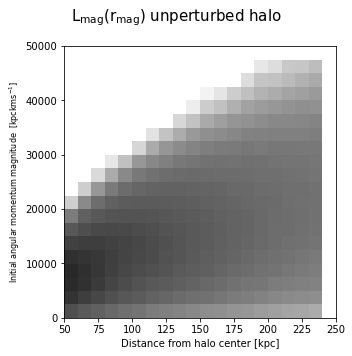

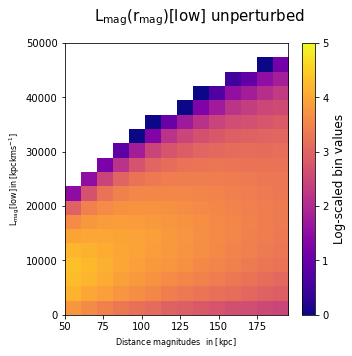

In [670]:
#Grafica de la magnitud del momento angular vs radio
reload(pl)
pl.hist_r_l(mw)


bins_r = np.arange(50, 200, 10)
bins_L = np.arange(9, 50000, 2500)
hist = pl.calculate_histogram(mw, bins_r, bins_L)
pl.plot_histogram(hist, "example")

In [ ]:
# pl.hist_proj_r_l(mw,'yz')

# Primera seleccion

the shape of pos below threshold (259716,)
the shape of ids below threshold (259716,)
first 10 ids [1.04398658e+08 8.50995300e+07 6.28193870e+07 2.05286200e+07
 6.26671980e+07 6.39184520e+07 4.88569010e+07 9.32216300e+06
 1.04990588e+08 1.23726040e+07]
the shape of mw_sel1 (259716, 16)


/home/jovyan/home/wakefinder/src/scripts/plots.py:115: RuntimeWarning:

divide by zero encountered in log10



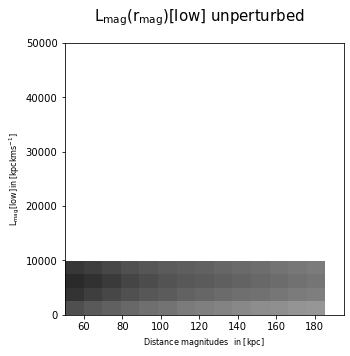

the shape of mw_sel1 (259716, 16)
the shape of common_ids (259716,)
first 10 common ids [1.04398658e+08 8.50995300e+07 6.28193870e+07 2.05286200e+07
 6.26671980e+07 6.39184520e+07 4.88569010e+07 9.32216300e+06
 1.04990588e+08 1.23726040e+07]
all ids are in the perturbed halo
(259716,)
(259716,)


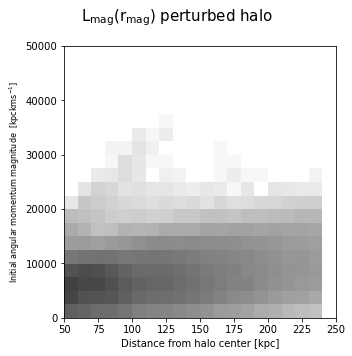

In [668]:
#selecciona las particulas que estan en el rango de radio y momento angular
# low_L, ids_nopert = rc.threshold_L(mw_lmc_halo,5000,10000)
low_L, ids_nopert = rc.threshold_L(mw,0000,9000)
mw_sel1 = np.copy(mw[low_L])
# mw_sel1 = np.copy(mw_lmc_halo[low_L])

print("the shape of mw_sel1", mw_sel1.shape)
reload(pl)
pl.hist_L_r_low(mw_sel1[:,8], mw_sel1[:,10],'mw_sel1')
print("the shape of mw_sel1", mw_sel1.shape)
mw_sel1 = np.copy(mw[low_L])
# mw_sel1 = np.copy(mw_lmc_halo[low_L])
ids_perthalo, common_ids = rc.get_ids(mw, mw_lmc, ids_nopert)
# ids_perthalo, common_ids = rc.get_ids(mw_lmc_halo, mw_halo, ids_nopert)
# check if all selected particles are in the perturbed halo
# rc.test_ids(common_ids, mw_halo)

rc.test_ids(common_ids, mw_lmc)
#select particles in the perturbed halo
mw_lmc_sel1 = np.copy(mw_lmc[ids_perthalo])
# mw_lmc_sel1 = np.copy(mw_halo[ids_perthalo])

reload(pl)
pl.hist_r_l(mw_lmc_sel1,True,'mw_lmc_sel1')

# Segunda seleccion

the shape of line_1 (307754,)
the shape of line_2 (307754,)
the shape of select2_part (143,)
(143,)
(143,)


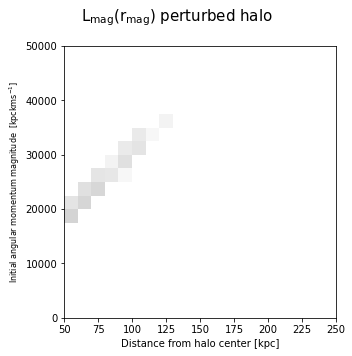

In [661]:
# sel2_part = rc.sel2(mw_lmc_sel1,220,50,13000,20000)
sel2_part = rc.sel2(mw_lmc_sel1,220,50,18000,21880)
pl.hist_r_l(mw_lmc_sel1[sel2_part],True,'mw_lmc_sel2')
wake_particles_pert, wake_particles_no_pert = rc.selected_ids(mw_lmc_sel1, sel2_part, mw, mw_lmc)

# Graficas

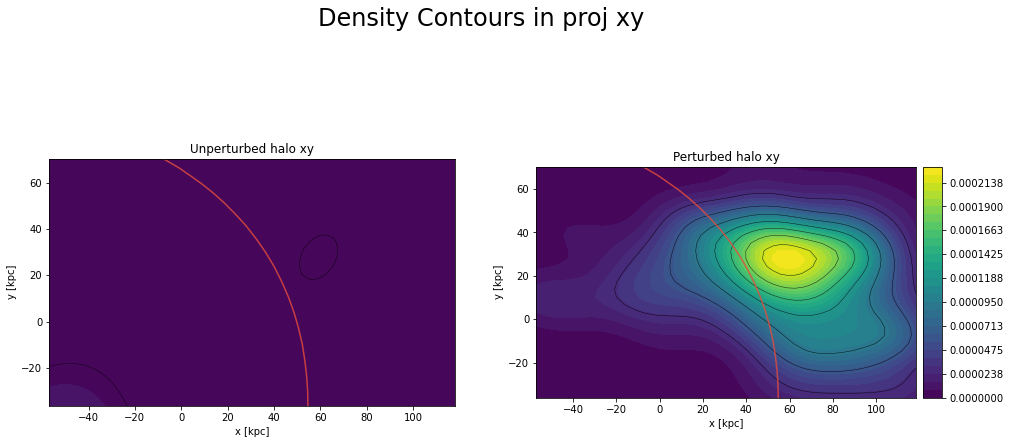

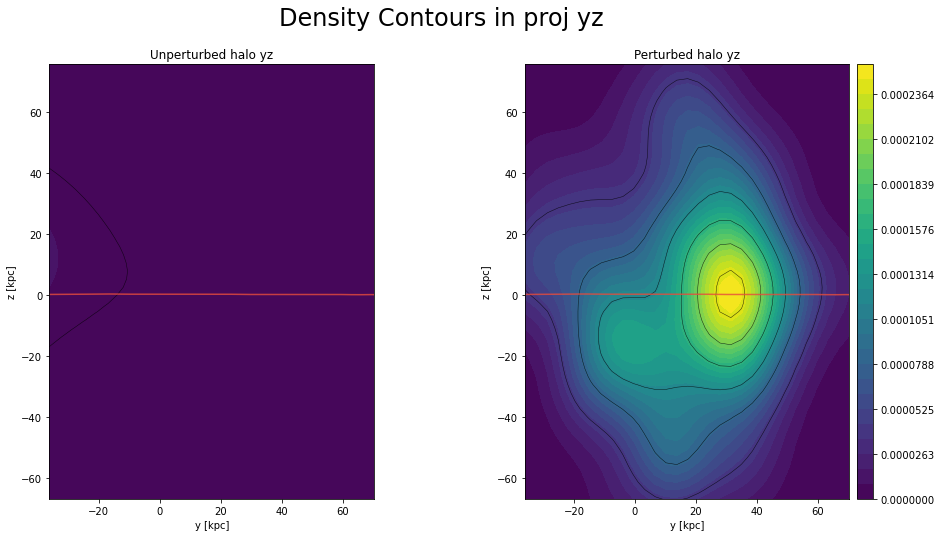

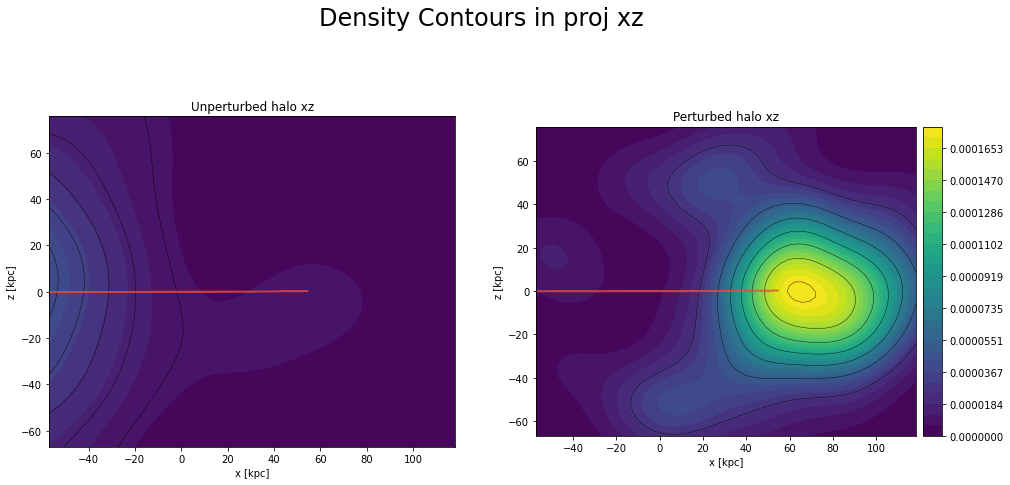

In [662]:

pl.comparison_density_contour_plt(wake_particles_no_pert, wake_particles_pert, rel_lmc, 'xy')
pl.comparison_density_contour_plt(wake_particles_no_pert, wake_particles_pert, rel_lmc, 'yz')
pl.comparison_density_contour_plt(wake_particles_no_pert, wake_particles_pert, rel_lmc, 'xz')

Mean angle:  -1.8483666134607506
Standard deviation of angles:  0.6013730300690805
Circular variance:  0.16312869193207113
Divergence_1:  [  54.85534044  -11.24495896  -19.15361766 -110.1716398    -5.68606808
  110.96653415    0.67089403  -18.02406424    4.05352186   32.23288459
  -55.77329388  -70.74032349   32.85862138   17.77388756   10.37823063
   19.82903528  -13.8472269    20.61475299]
Divergence:  44.43896486012906
Divergence_1 shape:  ()
shape grad_x1:  (18,)
shape grad_y1:  (18,)
Skewness of unperturbed halo inx direction: 4.514604632350788
Skewness of unperturbed halo in y direction: 4.097581203381475
Skewness of perturbed halo in x direction: 1.2030866674528227
Skewness of perturbed halo in y direction: 2.5439652291370645
Mean angle:  1.4894942764437884
Standard deviation of angles:  0.18106466716309727
Circular variance:  0.01630547713342101
Divergence2 :  [-23.1454801   37.12420202  39.45306874 -72.7276844   25.52257447
  59.03004603  -2.10374476  40.79967113   9.78209381 

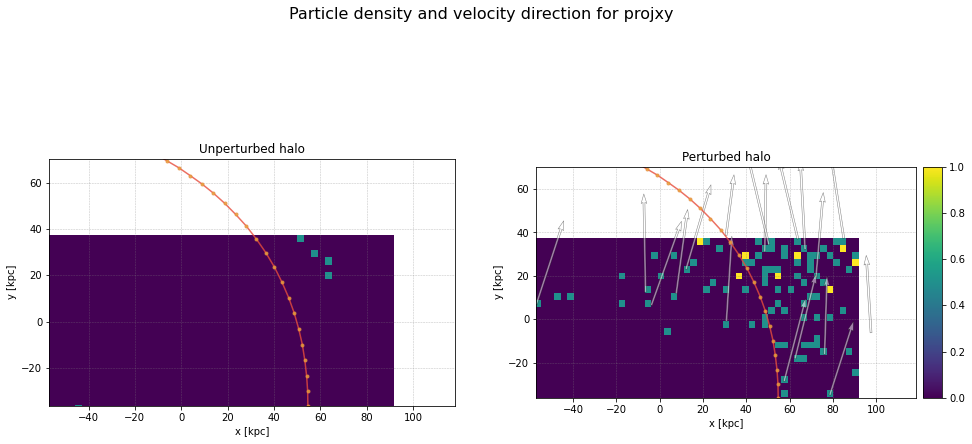

Mean angle:  -0.928552510848762
Standard deviation of angles:  2.572937695454219
Circular variance:  0.15956535450496334
Divergence_1:  [ 31.6875977  -10.48434758 -10.70214259 -45.98762586  -7.46082546
  37.77956915  -0.07456215  11.65078789  27.11294979  -5.90124026
 -54.59561445 -53.97805309  24.22552808   5.00707385  13.73577205
  52.25715842 -30.96517569 -26.44718821]
Divergence:  -0.06797199333243675
Divergence_1 shape:  ()
shape grad_x1:  (18,)
shape grad_y1:  (18,)
Skewness of unperturbed halo iny direction: 5.060182133049145
Skewness of unperturbed halo in z direction: 4.568936599663813
Skewness of perturbed halo in y direction: 3.3557368840261406
Skewness of perturbed halo in z direction: 1.2194928467314912
Mean angle:  0.03591522634404043
Standard deviation of angles:  0.2831840192423911
Circular variance:  0.0390915427699442
Divergence2 :  [210.43730584  89.49115226  53.34684044  64.2916914  -37.71104802
 -46.68382504  -6.2023504  -12.12214663 -72.61740992  75.31563541
 116.

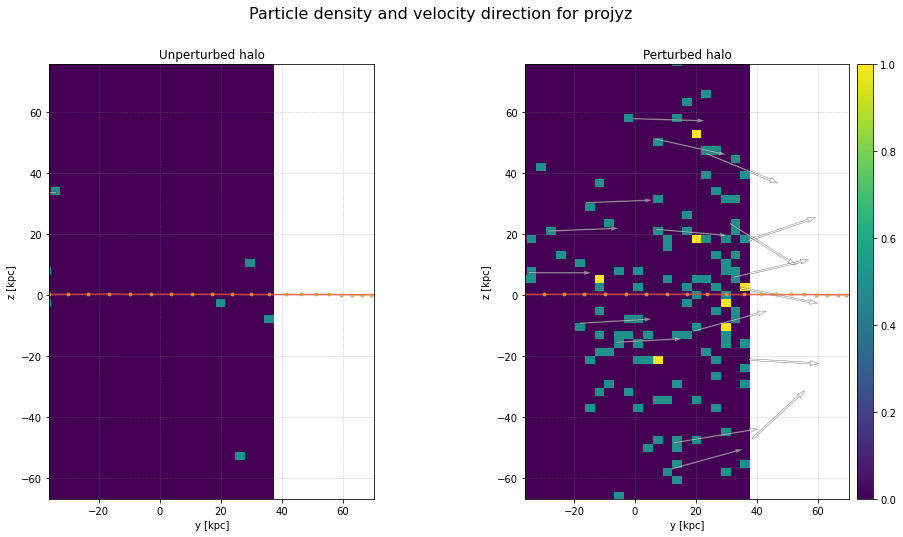

Mean angle:  -0.5500202312696112
Standard deviation of angles:  2.0100481080043315
Circular variance:  0.5809518172063554
Divergence_1:  [116.12428904  28.68479553 -38.49997384 -57.1008543    7.69795124
  53.71470912  -0.31435428  -6.35827758   5.36908285   5.35399153
 -35.31280433 -23.63279128  42.6722147   -1.93518952 -22.98075533
  26.8827147   -9.52187017 -36.8749257 ]
Divergence:  84.36871934455166
Divergence_1 shape:  ()
shape grad_x1:  (18,)
shape grad_y1:  (18,)
Skewness of unperturbed halo inx direction: 5.030909470237837
Skewness of unperturbed halo in z direction: 4.133321421946695
Skewness of perturbed halo in x direction: 3.0997983062619245
Skewness of perturbed halo in z direction: 2.4232986934129963
Mean angle:  0.2335653386507936
Standard deviation of angles:  1.4730353523056232
Circular variance:  0.6875010956608982
Divergence2 :  [ 185.88503512  140.76937988   61.77611957  -30.337843     -9.40362176
  -10.35018841   -1.74549769   34.08845853  -68.97419372  -11.1828380

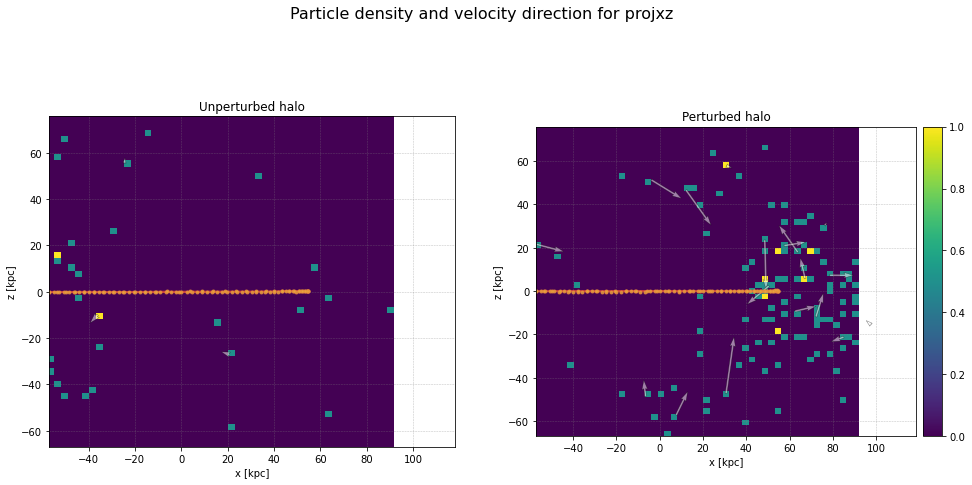

In [663]:
reload(pl)
pl.comparison_hist_orbit_plt(wake_particles_no_pert, wake_particles_pert,rel_lmc, 'xy',8,1500,0.005)
pl.comparison_hist_orbit_plt(wake_particles_no_pert, wake_particles_pert,rel_lmc, 'yz',8,1500,0.005)
# Hacer zoom 
pl.comparison_hist_orbit_plt(wake_particles_no_pert, wake_particles_pert,rel_lmc, 'xz',8,1500,0.005)

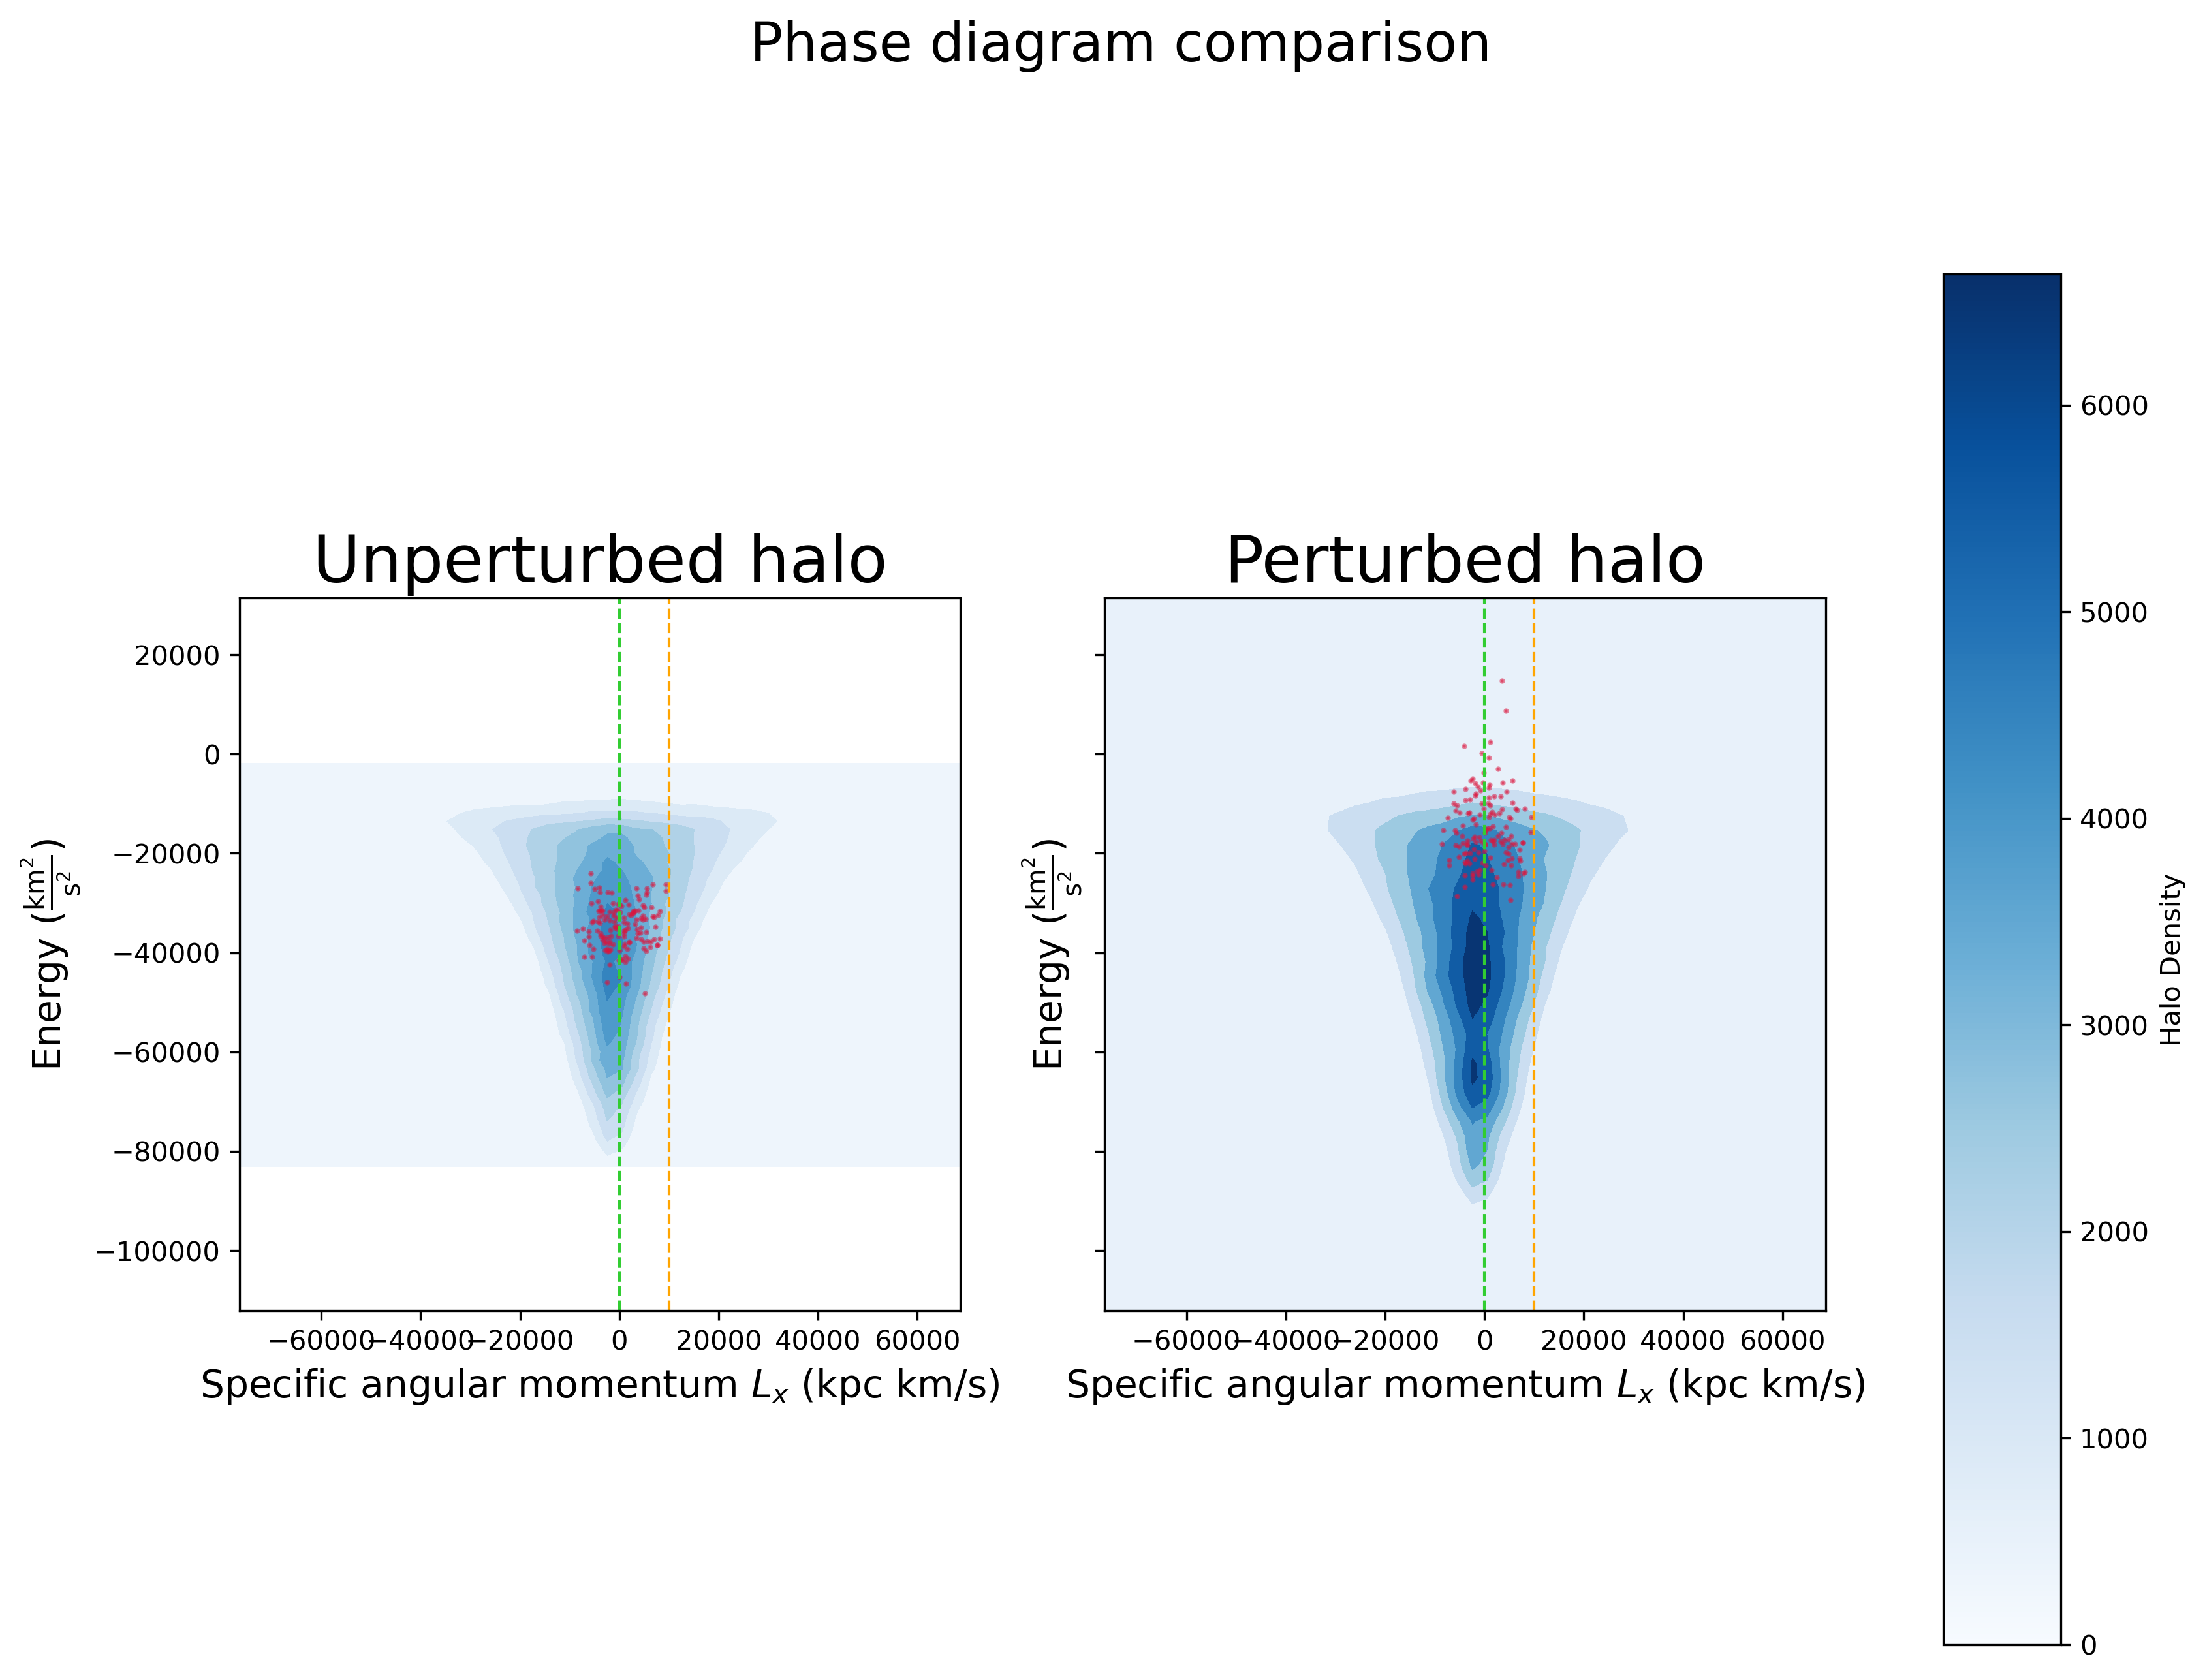

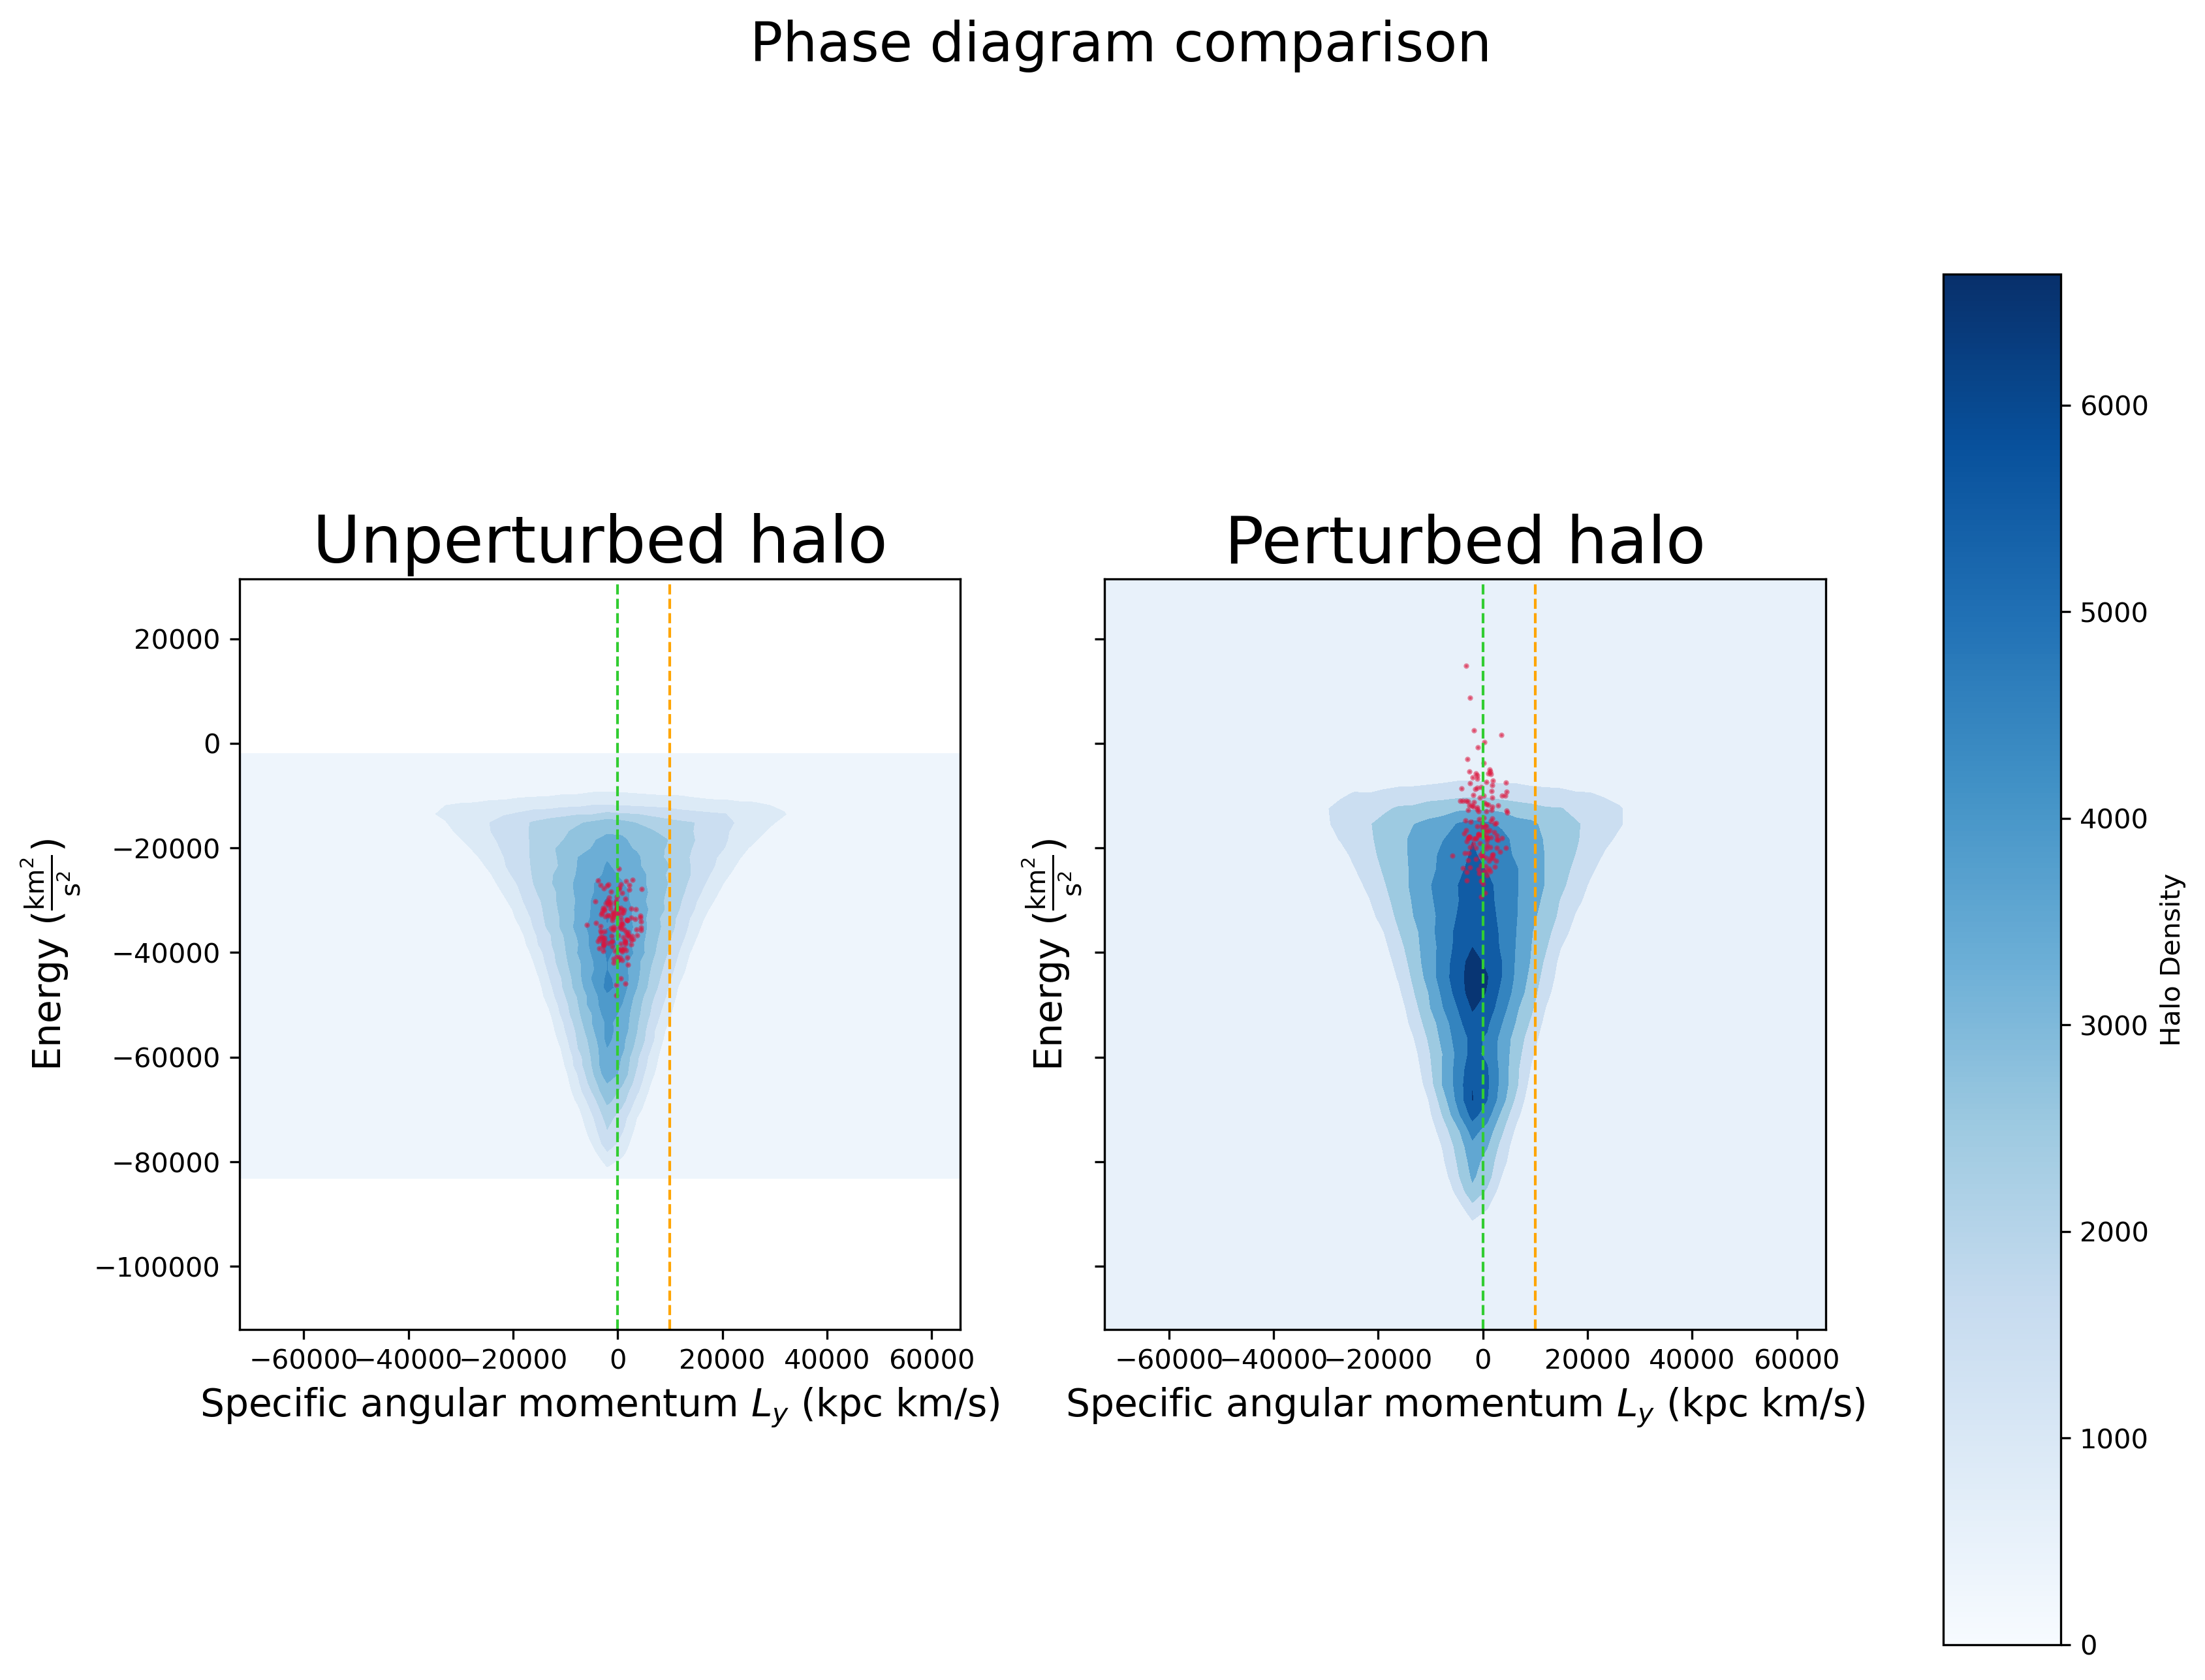

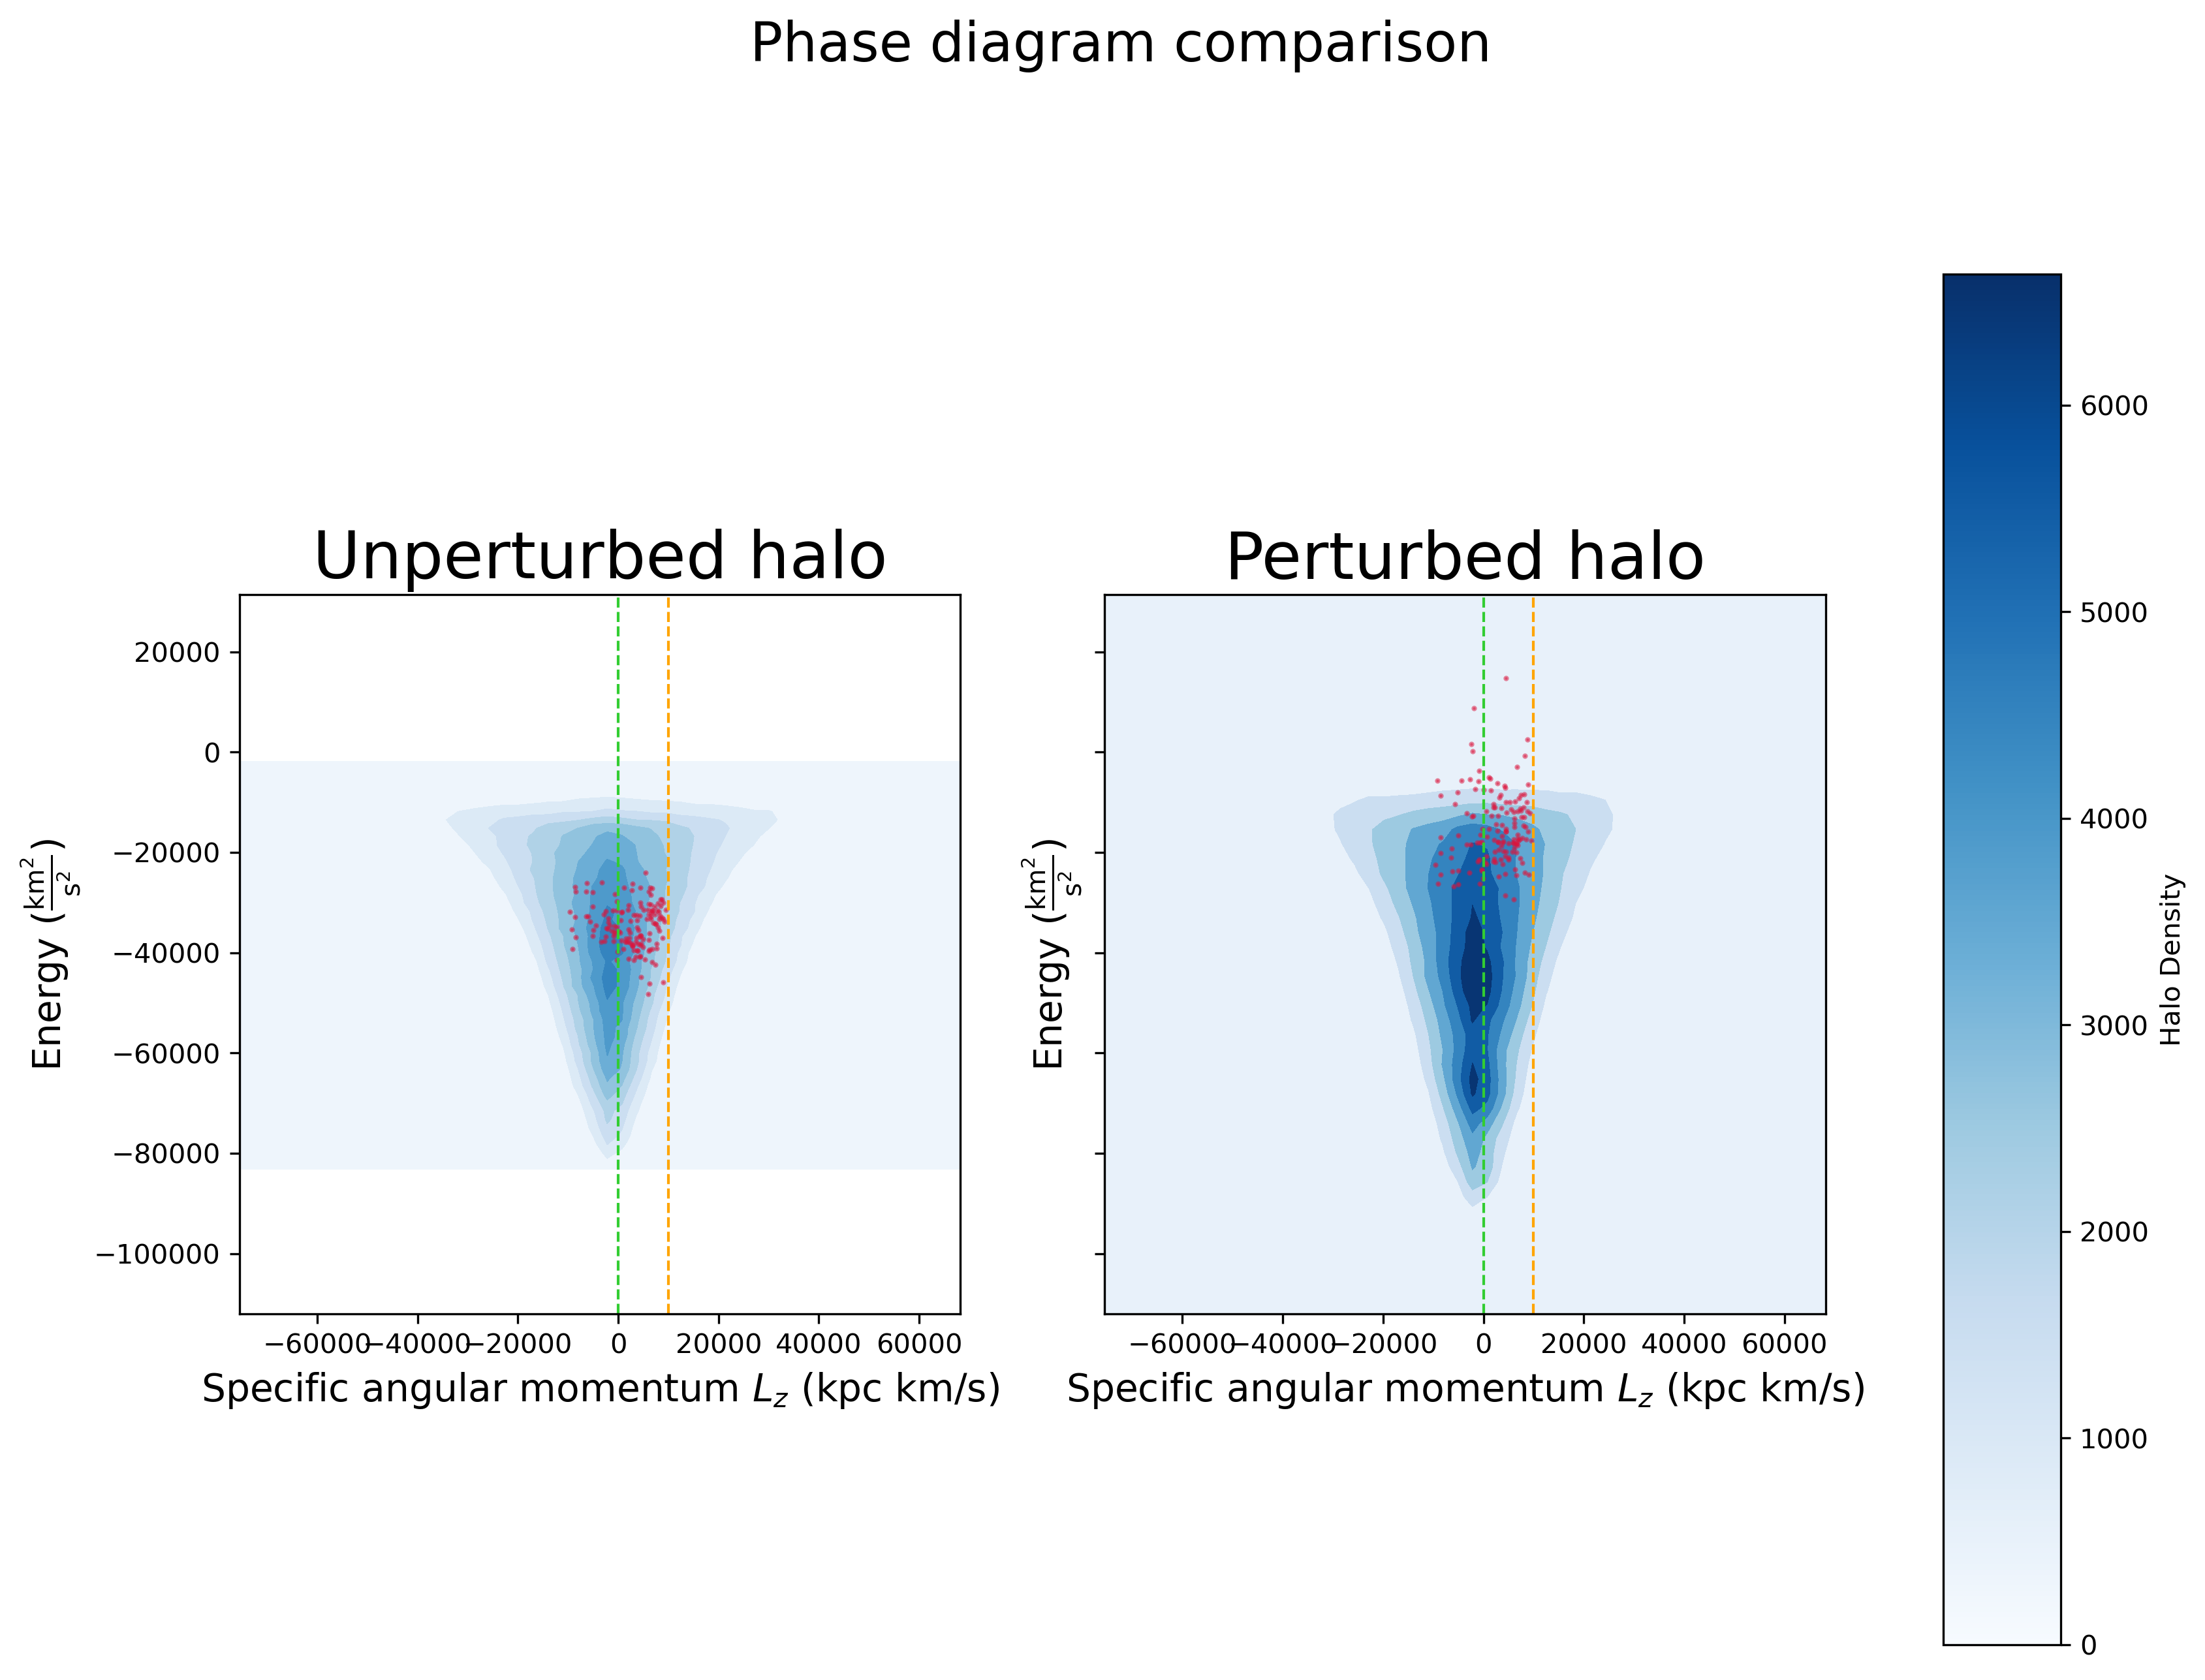

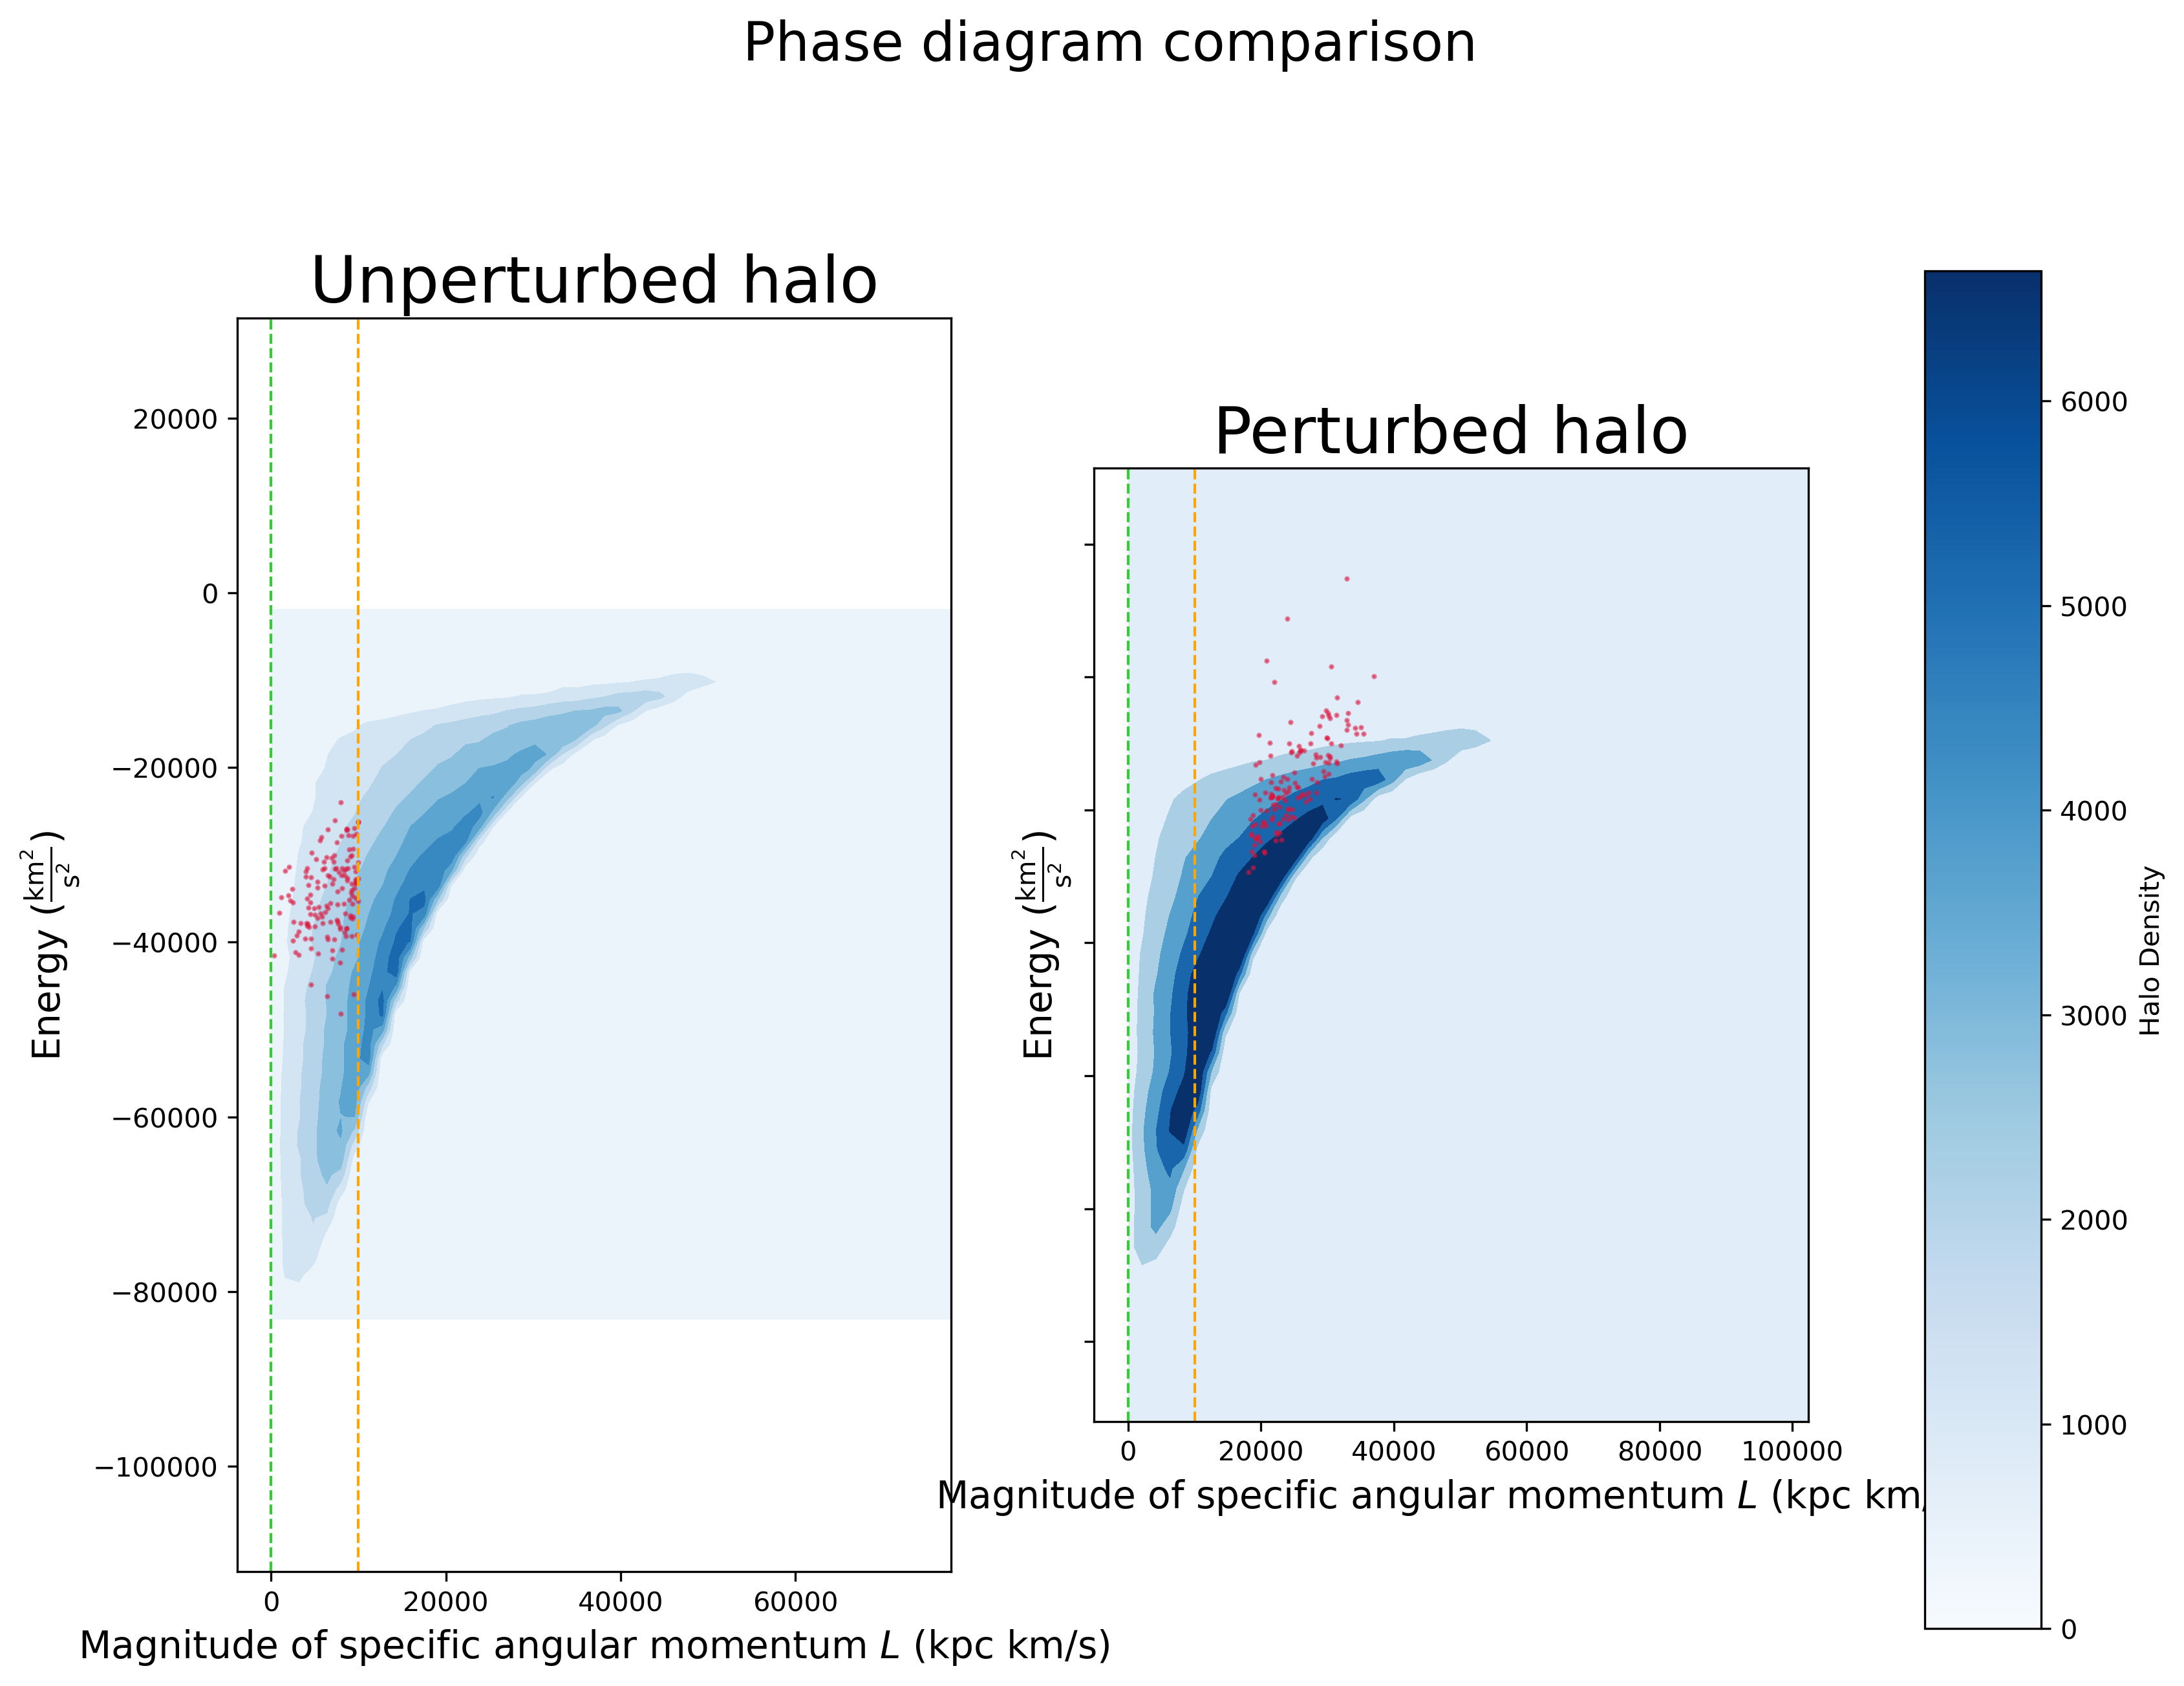

In [666]:
pl.econt_scatter_side(mw, mw_lmc, wake_particles_no_pert, wake_particles_pert,'x')
pl.econt_scatter_side(mw, mw_lmc,wake_particles_no_pert, wake_particles_pert, 'y')
pl.econt_scatter_side(mw, mw_lmc, wake_particles_no_pert, wake_particles_pert,'z')
pl.econt_scatter_side(mw, mw_lmc, wake_particles_no_pert, wake_particles_pert,'mag')

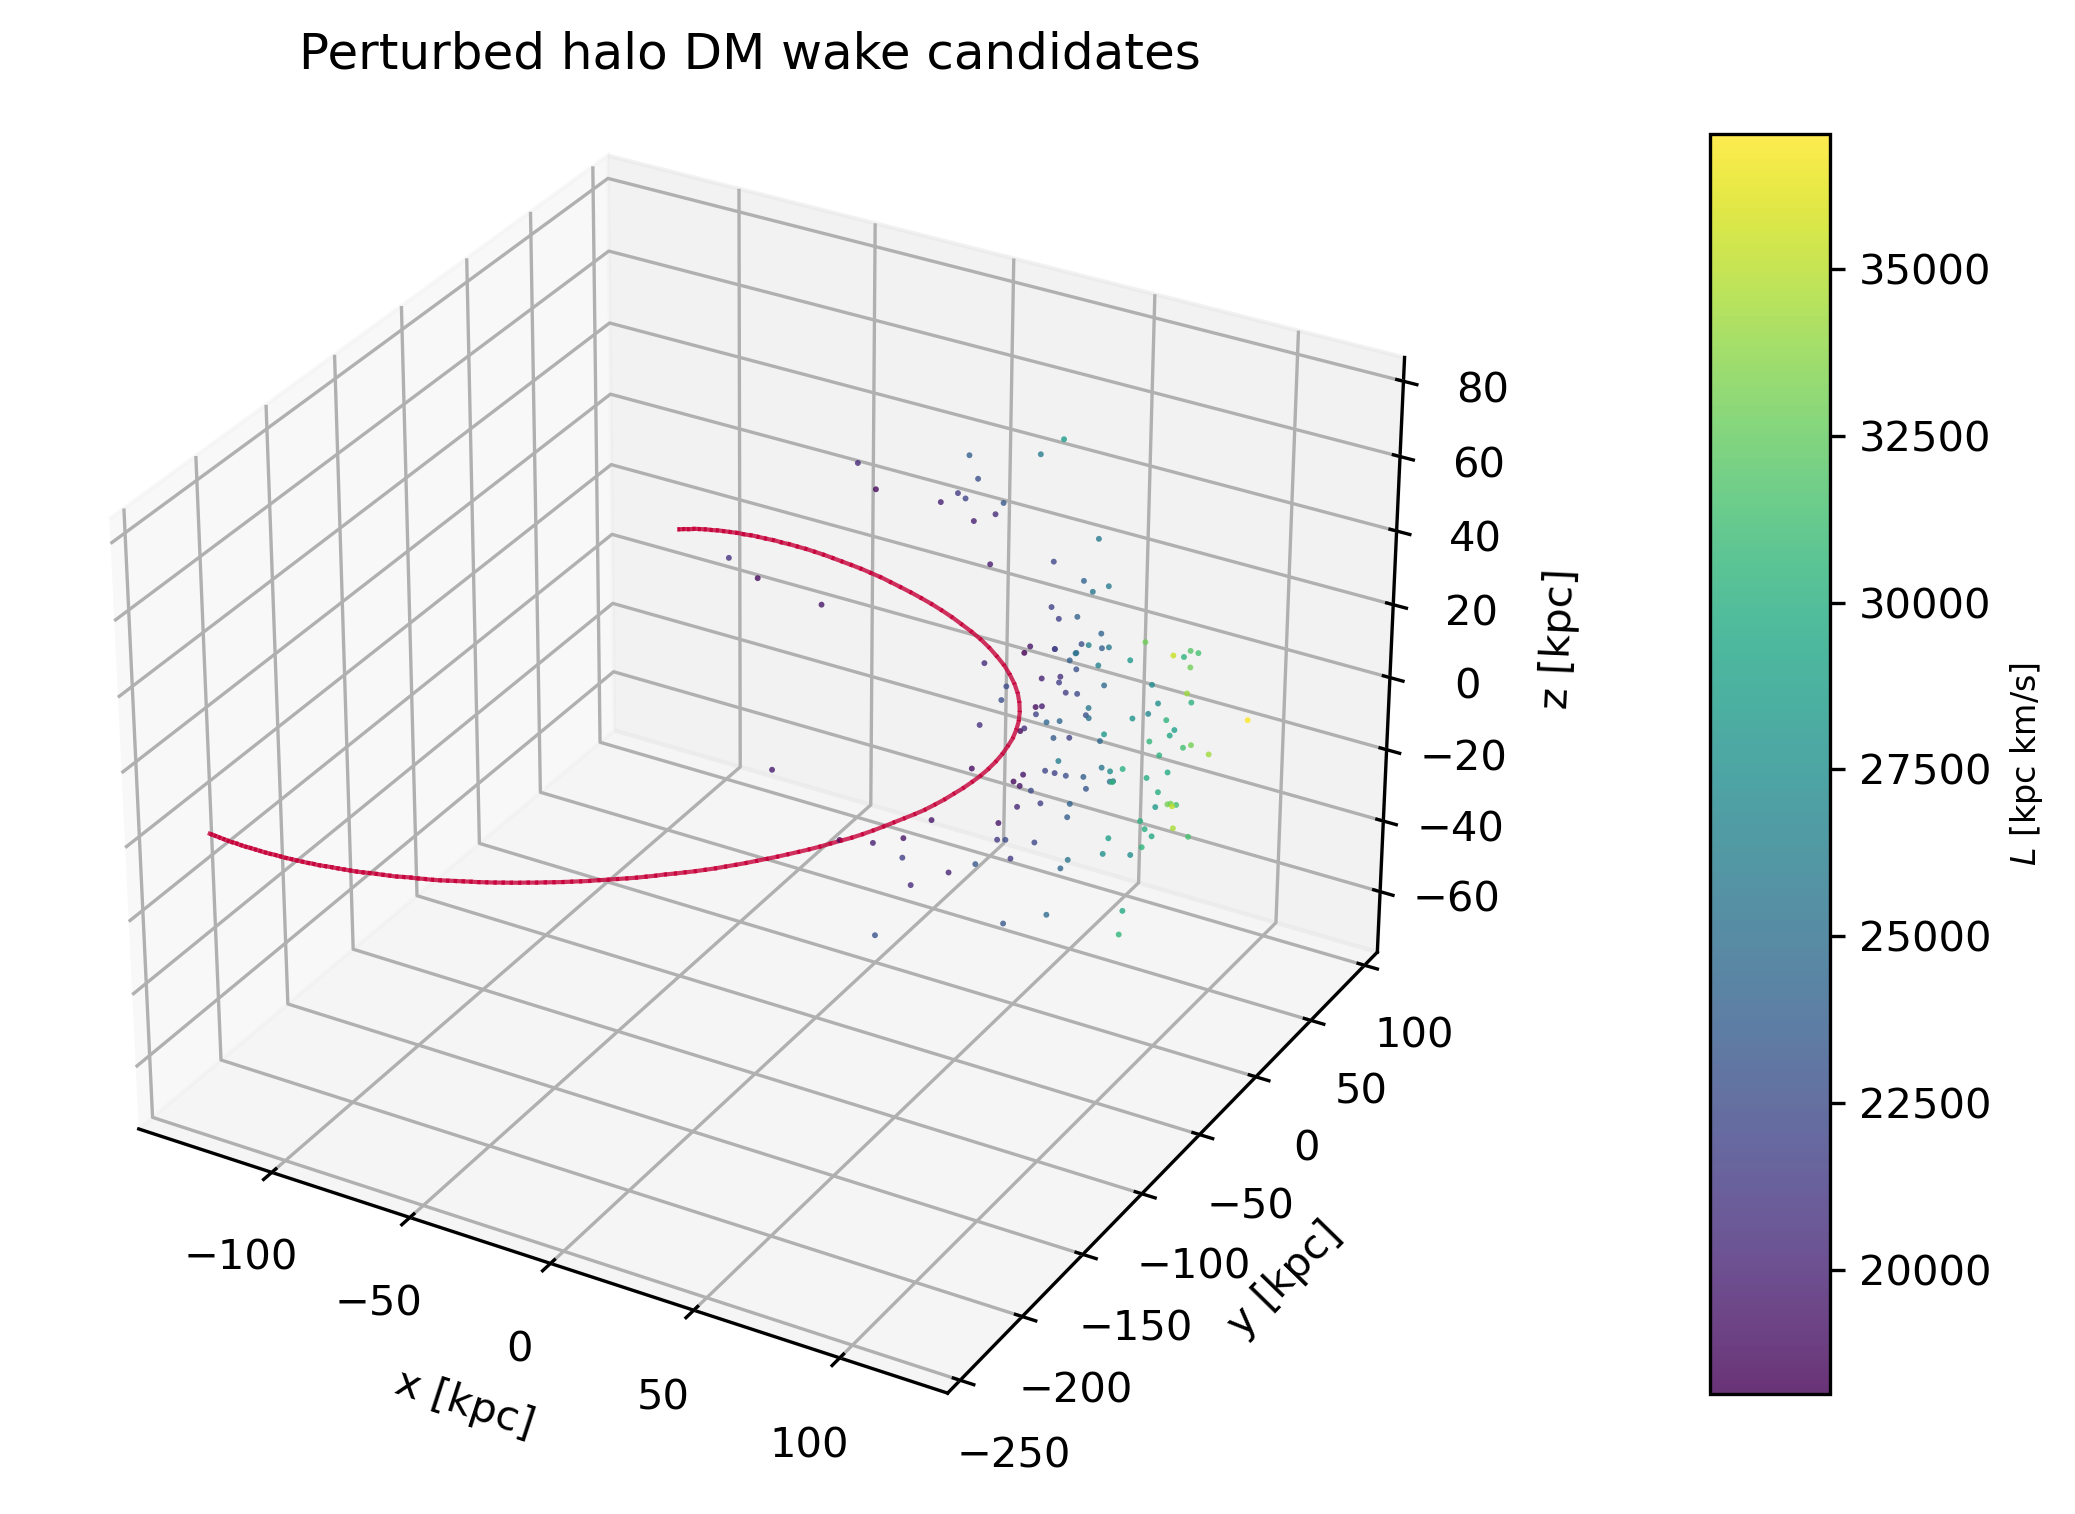

In [667]:
pl.plot_3d(wake_particles_pert, rel_lmc, 'DM wake pert part')
pl.plot_3d_plt(wake_particles_pert, rel_lmc, 'Perturbed halo DM wake candidates')


In [ ]:
# pl.plot_3d(wake_particles_no_pert, rel_lmc, 'DM wake no pert part')

In [ ]:
pl.proj_both(wake_particles_no_pert, wake_particles_pert, rel_lmc,"xy")
pl.proj_both(wake_particles_no_pert, wake_particles_pert, rel_lmc,"xz")
pl.proj_both(wake_particles_no_pert, wake_particles_pert, rel_lmc,"yz")

In [ ]:
pl.proj_xy(wake_particles_pert, rel_lmc)

In [ ]:
pl.proj_xz(wake_particles_pert, rel_lmc)

In [ ]:
pl.proj_yz(wake_particles_pert, rel_lmc)

In [ ]:
pl.vector_field(wake_particles_pert,rel_lmc,'xz',150)

In [ ]:
pl.vector_field(wake_particles_pert,rel_lmc,'yz',150)

In [ ]:
pl.vector_field(wake_particles_pert,rel_lmc,'xy',150)


In [ ]:
pl.vec_field2(wake_particles_pert, wake_particles_no_pert, rel_lmc, 'xy')

In [ ]:
pl.vec_field2(wake_particles_pert, wake_particles_no_pert, rel_lmc, 'xz')

In [ ]:
pl.vec_field2(wake_particles_pert, wake_particles_no_pert, rel_lmc, 'yz')


In [ ]:
pl.density_contour_plt(wake_particles_no_pert,rel_lmc, 'yz')
pl.density_contour_plt(wake_particles_pert,rel_lmc, 'yz')

In [ ]:
pl.vector_field_plt(wake_particles_pert, rel_lmc, 'yz',20,2500,0.005, True)
pl.vector_field_plt(wake_particles_no_pert, rel_lmc, 'yz',10,2500,0.005, False)

In [ ]:
pl.vector_field_plt(wake_particles_pert, rel_lmc, 'yz',20,2500,0.005, True)

In [ ]:
pl.hist_orbit_plt(wake_particles_pert, rel_lmc, 'yz',8,3000,0.005, True)
pl.hist_orbit_plt(wake_particles_no_pert, rel_lmc, 'yz',8,3000,0.005, False)


In [ ]:
reload(pl)
pl.E_L(mw,  'x', 'scatter', wake_particles_no_pert)
pl.E_L(mw,  'y', 'scatter', wake_particles_no_pert)
pl.E_L(mw,  'z', 'scatter', wake_particles_no_pert)
pl.E_L(mw,  'mag', 'scatter', wake_particles_no_pert)
pl.E_L(mw_lmc,  'x', 'scatter', wake_particles_pert)
pl.E_L(mw_lmc,  'y', 'scatter', wake_particles_pert)
pl.E_L(mw_lmc,  'z', 'scatter', wake_particles_pert)
pl.E_L(mw_lmc,  'mag', 'scatter', wake_particles_pert)


In [ ]:
reload(pl)
pl.econt_side_by_side(mw, mw_lmc,'x')
pl.econt_side_by_side(mw, mw_lmc,'y')
pl.econt_side_by_side(mw, mw_lmc,'z')
pl.econt_side_by_side(mw, mw_lmc,'mag')


In [ ]:
reload(pl)
pl.E_L_contour(mw,  'x')
pl.E_L_contour(mw_lmc,  'x')
pl.E_L_contour(mw,  'y')
pl.E_L_contour(mw_lmc,  'y')
pl.E_L_contour(mw,  'z')
pl.E_L_contour(mw_lmc,  'z')


# pl.E_L_contour(wake_particles_pert,  'x', wake_particles_pert)


In [ ]:
reload(pl)
pl.comparison_E_L(mw_lmc,wake_particles_pert,mw,wake_particles_no_pert, 'x')
pl.comparison_E_L(mw_lmc,wake_particles_pert,mw,wake_particles_no_pert, 'y')
pl.comparison_E_L(mw_lmc,wake_particles_pert,mw,wake_particles_no_pert, 'z')
pl.comparison_E_L(mw_lmc,wake_particles_pert,mw,wake_particles_no_pert, 'mag')

# Generalizacion

In [ ]:
sel2_sel3 = rc.L_delta(wake_particles_pert, wake_particles_no_pert, 200)
pl.sel3(sel2_sel3, rel_lmc, 'xz')
pl.sel3(sel2_sel3, rel_lmc, 'yz')
pl.sel3(sel2_sel3, rel_lmc, 'xy')

In [ ]:
pl.plot_3d(sel2_sel3, rel_lmc, "Seleccion 3")

In [ ]:
sel1_sel3 = rc.L_delta(mw_lmc_sel1, mw_sel1, 900)
pl.sel3(sel1_sel3, rel_lmc, 'xz')
pl.sel3(sel1_sel3, rel_lmc, 'yz')
pl.sel3(sel1_sel3, rel_lmc, 'xy')



In [ ]:
pl.plot_3d(sel1_sel3, rel_lmc, "Seleccion 3")

In [ ]:
L_mag_delta_rot = rc.L_mag_delta(mw_lmc_sel1[:,10] , mw_sel1[:,10])
L_mag_delta = np.copy(L_mag_delta_rot[:,np.newaxis])
print("the shape of L_mag_delta_rot", L_mag_delta.shape)
print("L_mag", wake_particles_pert[:,10].shape)